![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [42]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from src import soporte_abtesting as sa
from src import soporte_descriptiva as sd
from src import soporte_combinatoria as sc
import math
sns.set_style("dark")
sns.set_theme(style="dark")
plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")


In [43]:
df= pd.read_csv('datos/alas_del_mundo.csv')
df.head(2)
df.shape
sa.exploracion_dataframe(df, "Education")

El número de datos es 405624 y el de columnas es 16

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Province,object
City,object
Gender,object
Education,object
Salary,float64
Loyalty Card,object
CLV,float64
Enrollment Type,object
Enrollment Year,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROVINCE tiene las siguientes valore únicos:


,count
Province,
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,count
City,
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,count
Education,
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna LOYALTY CARD tiene las siguientes valore únicos:


,count
Loyalty Card,
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,count
Enrollment Type,
Standard,382200
2018 Promotion,23424



 ..................... 

Los principales estadísticos de las columnas categóricas para el BACHELOR son: 


,count,unique,top,freq
Province,253752,11,Ontario,81192
City,253752,29,Toronto,51120
Gender,253752,2,Female,127872
Education,253752,1,Bachelor,253752
Loyalty Card,253752,3,Star,108336
Enrollment Type,253752,2,Standard,238488



 ..................... 

Los principales estadísticos de las columnas numéricas para el BACHELOR son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,253752.0,548236.928024,260404.939311,100018.00,323424.00,548238.00,772484.00,999986.00
Salary,253752.0,72476.211860,17205.712889,-58486.00,58711.00,71971.00,85848.00,105563.00
CLV,253752.0,8215.816801,7061.053007,2255.31,4150.84,5867.13,9082.83,83325.38
Enrollment Year,253752.0,2015.263407,1.988988,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,253752.0,6.649295,3.381761,1.00,4.00,7.00,10.00,12.00
Year,253752.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,253752.0,6.500000,3.452059,1.00,3.75,6.50,9.25,12.00
Flights Booked,253752.0,4.091093,5.216995,0.00,0.00,1.00,8.00,21.00
Distance,253752.0,1202.803284,1432.310025,0.00,0.00,450.00,2326.00,6262.00
Points Accumulated,253752.0,123.156014,146.619868,0.00,0.00,46.00,238.00,675.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el COLLEGE son: 


,count,unique,top,freq
Province,102672,11,Ontario,33624
City,102672,29,Toronto,20280
Gender,102672,2,Male,52104
Education,102672,1,College,102672
Loyalty Card,102672,3,Star,51072
Enrollment Type,102672,2,Standard,96936



 ..................... 

Los principales estadísticos de las columnas numéricas para el COLLEGE son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,102672.0,549515.872370,255302.043587,100102.00,331184.00,547637.00,765252.00,999982.00
Salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV,102672.0,7575.448806,6546.384983,1898.01,3744.58,5568.95,8489.84,74228.52
Enrollment Year,102672.0,2015.270220,1.962468,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,102672.0,6.666199,3.434345,1.00,4.00,7.00,10.00,12.00
Year,102672.0,2017.500000,0.500002,2017.00,2017.00,2017.50,2018.00,2018.00
Month,102672.0,6.500000,3.452069,1.00,3.75,6.50,9.25,12.00
Flights Booked,102672.0,4.153012,5.242136,0.00,0.00,1.00,8.00,21.00
Distance,102672.0,1215.317672,1432.353262,0.00,0.00,531.00,2345.00,6293.00
Points Accumulated,102672.0,124.229162,146.380332,0.00,0.00,54.00,240.00,655.50



 ..................... 

Los principales estadísticos de las columnas categóricas para el MASTER son: 


,count,unique,top,freq
Province,12336,11,Ontario,4128
City,12336,29,Toronto,2496
Gender,12336,2,Female,6456
Education,12336,1,Master,12336
Loyalty Card,12336,3,Star,6696
Enrollment Type,12336,2,Standard,11880



 ..................... 

Los principales estadísticos de las columnas numéricas para el MASTER son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,12336.0,548875.406615,264617.066194,100644.00,315869.00,548212.00,781463.00,998072.00
Salary,12336.0,103767.494163,17514.343573,56414.00,88120.00,105487.00,118530.00,133080.00
CLV,12336.0,7524.240117,5924.737304,2174.11,3600.93,5205.88,10083.49,30591.61
Enrollment Year,12336.0,2015.233463,1.943833,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,12336.0,6.826848,3.389750,1.00,4.00,7.00,10.00,12.00
Year,12336.0,2017.500000,0.500020,2017.00,2017.00,2017.50,2018.00,2018.00
Month,12336.0,6.500000,3.452192,1.00,3.75,6.50,9.25,12.00
Flights Booked,12336.0,4.184014,5.210294,0.00,0.00,1.00,8.00,21.00
Distance,12336.0,1233.865678,1436.885423,0.00,0.00,627.00,2364.25,6180.00
Points Accumulated,12336.0,126.005763,146.745494,0.00,0.00,64.00,241.94,625.50



 ..................... 

Los principales estadísticos de las columnas categóricas para el HIGH SCHOOL OR BELOW son: 


,count,unique,top,freq
Province,19008,11,Ontario,6312
City,19008,29,Toronto,3888
Gender,19008,2,Female,9720
Education,19008,1,High School or Below,19008
Loyalty Card,19008,3,Star,9672
Enrollment Type,19008,2,Standard,17808



 ..................... 

Los principales estadísticos de las columnas numéricas para el HIGH SCHOOL OR BELOW son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,19008.0,558216.804293,258662.751947,101148.00,332180.75,561366.00,782612.75,994541.0
Salary,19008.0,60986.544192,12723.916043,-49830.00,52044.75,61806.00,71344.00,93875.0
CLV,19008.0,7722.940328,6657.946709,2272.34,3707.28,5269.28,8991.98,43290.5
Enrollment Year,19008.0,2015.193182,1.984666,2012.00,2013.00,2015.00,2017.00,2018.0
Enrollment Month,19008.0,6.609848,3.457341,1.00,4.00,7.00,10.00,12.0
Year,19008.0,2017.500000,0.500013,2017.00,2017.00,2017.50,2018.00,2018.0
Month,19008.0,6.500000,3.452143,1.00,3.75,6.50,9.25,12.0
Flights Booked,19008.0,4.155777,5.234551,0.00,0.00,1.00,8.00,21.0
Distance,19008.0,1225.585543,1435.875594,0.00,0.00,580.00,2363.25,6032.0
Points Accumulated,19008.0,125.176770,146.493283,0.00,0.00,59.50,242.00,661.5



 ..................... 

Los principales estadísticos de las columnas categóricas para el DOCTOR son: 


,count,unique,top,freq
Province,17856,11,Ontario,5640
City,17856,29,Toronto,3312
Gender,17856,2,Female,9024
Education,17856,1,Doctor,17856
Loyalty Card,17856,3,Star,8448
Enrollment Type,17856,2,Standard,17088



 ..................... 

Los principales estadísticos de las columnas numéricas para el DOCTOR son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,17856.0,570729.143817,253980.381625,101594.00,359104.5000,581403.50,785276.250,999911.00
Salary,17856.0,178335.439516,70307.642502,48109.00,124343.7500,180440.00,235069.250,407228.00
CLV,17856.0,7815.538978,6466.157567,2119.89,4056.4125,5619.19,8580.735,58207.13
Enrollment Year,17856.0,2015.072581,1.949028,2012.00,2013.0000,2015.00,2017.000,2018.00
Enrollment Month,17856.0,6.896505,3.389085,1.00,4.0000,7.00,10.000,12.00
Year,17856.0,2017.500000,0.500014,2017.00,2017.0000,2017.50,2018.000,2018.00
Month,17856.0,6.500000,3.452149,1.00,3.7500,6.50,9.250,12.00
Flights Booked,17856.0,4.146281,5.250093,0.00,0.0000,1.00,8.000,21.00
Distance,17856.0,1223.176131,1443.825996,0.00,0.0000,534.50,2368.000,6293.00
Points Accumulated,17856.0,125.057556,147.555733,0.00,0.0000,54.00,241.000,676.50


In [44]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mode()[0])
df['Salary'].mode()

0    101933.0
Name: Salary, dtype: float64

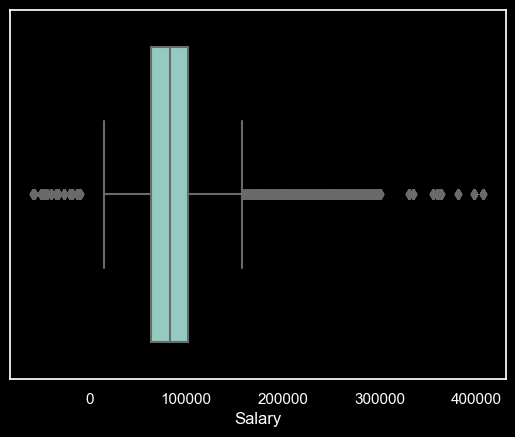

In [45]:
sns.boxplot(x = 'Salary', data =df)
plt.show()

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


In [46]:
normalidad = sa.Asunciones(df,'Loyalty Number')
normalidad.identificar_normalidad_analitica(metodo='kolmogorov', alpha=0.05, verbose=True)

homocedasticidad = sa.Asunciones(df,'Loyalty Number')
homocedasticidad.identificar_homogeneidad('Education')

Para la columna Loyalty Number, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Education las varianzas NO son homogéneas entre grupos.


In [47]:
test = sa.Pruebas_no_parametricas(df,'Loyalty Number','Education')
test.generar_grupos()

test.test_kruskal(test.generar_grupos())

Estadístico de prueba: 145.9096608069709
Valor p: 1.531391643969959e-30
Hay una diferencia significativa entre los datos antes y después


> Podemos decir que no es correcto aceptar la hipótesis nule

Este barplot nos ayuda a entender las gráficas


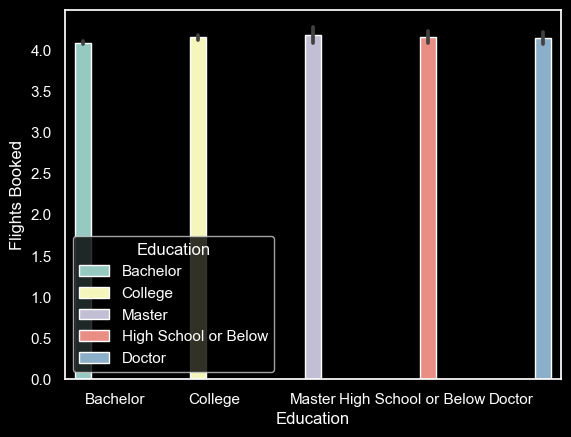

In [48]:
sns.barplot(x='Education', y='Flights Booked', data=df, hue = 'Education')
plt.show(print("Este barplot nos ayuda a entender las gráficas"))

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

In [49]:
normalidad_3= sa.Asunciones(df,'Salary')
normalidad_3.identificar_normalidad_analitica( metodo='kolmogorov', alpha=0.05, verbose=True)
print("------------------------------------------------")
homo_3 = sa.Asunciones(df,'Salary')
homo_3.identificar_homogeneidad('Gender')
print("------------------------------------------------")
test_3 = sa.Pruebas_no_parametricas(df,'Salary','Gender')
test_3.generar_grupos()
test_3.test_kruskal(test_3.generar_grupos())

Para la columna Salary, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
------------------------------------------------
En la variable Gender las varianzas NO son homogéneas entre grupos.
------------------------------------------------
Estadístico de prueba: 0.030606525186091665
Valor p: 0.8611211165194885
No hay evidencia suficiente para concluir que hay una diferencia significativa.


> Podemos decir que la hipoteseis alternativa si puede ser aceptada